Getting to Grip the F1 Data Analysis Modules, Packages and Key Concepts

***1. How to Analyze Formula 1 Telemetry 2022 - Python Tutorial*** 

Library Dedicated to F1 Fans who would like to take it upon themselves to find patterns in timming data, compare the performances of each constructors, and identify insights through the use of Data Science. 

&nbsp;&nbsp;&nbsp;&nbsp; [Jasper at Medium](https://medium.com/@jaspervhat/how-to-analyze-formula-1-telemetry-in-2022-a-python-tutorial-309ced4b8992) utilizes the *fasf1* library for providing data and Insights. In this Example he provides a data visualization of the Saudi Arabian 2022 GP. 

In [1]:
# Importing all Required Libraries

import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

The author recomends importing the telemetry informations in a "Cache" in the same directory as the notebook (A recommendatition that will be followed moving on). I will also keep the naming conventions of the article. 

In [2]:
# Importing the Information into the "cache" folder: 
ff1.Cache.enable_cache('cache') 

Collecting the data using this cache (basis is a .sqlite file) is done by specifying the year of the GrandPrix, the Grand Prix itself and the session we are interested in. We use the ".get_session()" command in order to get the relevant information, returning a "Session" Object. For the Grand Prix in Question: 

In [3]:
# Defining the Three variables of interest
year, grand_prix, session = 2022, 'Saudi Arabia', 'Q'

# Extracting the intended section information 
quali = ff1.get_session(year, grand_prix, session)
quali.load()


core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v2.2.2]
api            INFO 	No cached data found for driver_info. Loading data...
api            INFO 	Fetching driver list...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_data. Loading data...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for timing_app_data. Loading data...
api            INFO 	Fetching timing app data...
api            INFO 	Data has been written to cache!
core           INFO 	Processing timing data...
api            INFO 	No cached data found for session_status_data. Loading data...
api            INFO 	Fetching session status data...
api            INFO 	Data has been written to cache!
api            INFO 	No cached data found for track_status_data. Loading data...
api            INFO 	Fetchi

                     Time DriverNumber                LapTime  LapNumber  \
19 0 days 00:17:36.094000           16                    NaT          1   
20 0 days 00:19:42.996000           16 0 days 00:02:06.902000          2   
21 0 days 00:28:52.484000           16                    NaT          3   
22 0 days 00:30:52.685000           16                    NaT          4   
23 0 days 00:32:21.724000           16 0 days 00:01:29.039000          5   
24 0 days 00:34:44.330000           16 0 days 00:02:22.606000          6   
25 0 days 00:49:33.987000           16                    NaT          7   
26 0 days 00:51:02.870000           16 0 days 00:01:28.883000          8   
27 0 days 00:52:48.836000           16 0 days 00:01:45.966000          9   
28 0 days 01:54:31.435000           16                    NaT         10   
29 0 days 01:56:18.664000           16                    NaT         11   
30 0 days 01:58:23.455000           16 0 days 00:02:04.791000         12   
31 0 days 01

In [6]:
# Extracting Data of the Drives: Use their 3-letter Code
# PER - Sergio Perez
# LEC - Charles Leclerc
driver_PER , driver_LEC = 'PER' , 'LEC'

# Selecting their Qualy Laps with .pick_driver():
Qualy_PER = quali.laps.pick_driver(driver_PER)
Qualy_LEC = quali.laps.pick_driver(driver_LEC)

# Printing LeClerc's Qualy Laps: 
print(Qualy_PER)

                     Time DriverNumber                LapTime  LapNumber  \
19 0 days 00:17:36.094000           16                    NaT          1   
20 0 days 00:19:42.996000           16 0 days 00:02:06.902000          2   
21 0 days 00:28:52.484000           16                    NaT          3   
22 0 days 00:30:52.685000           16                    NaT          4   
23 0 days 00:32:21.724000           16 0 days 00:01:29.039000          5   
24 0 days 00:34:44.330000           16 0 days 00:02:22.606000          6   
25 0 days 00:49:33.987000           16                    NaT          7   
26 0 days 00:51:02.870000           16 0 days 00:01:28.883000          8   
27 0 days 00:52:48.836000           16 0 days 00:01:45.966000          9   
28 0 days 01:54:31.435000           16                    NaT         10   
29 0 days 01:56:18.664000           16                    NaT         11   
30 0 days 01:58:23.455000           16 0 days 00:02:04.791000         12   
31 0 days 01

In [9]:
# To select the Fastest Lap of the Driver in the session:
Best_LAP_LEC = Qualy_LEC.pick_fastest()
Best_LAP_PER = Qualy_PER.pick_fastest()

# Printing the Bast Lap from Perez: 
print(Best_LAP_PER)

# Adding the Actual Telemetry Data: 
Best_LAP_LEC_TEL = Best_LAP_LEC.get_telemetry().add_distance()
Best_LAP_PER_TEL = Best_LAP_PER.get_telemetry().add_distance()


Time                      0 days 02:19:28.320000
DriverNumber                                  11
LapTime                   0 days 00:01:28.200000
LapNumber                                     18
Stint                                          6
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:32.299000
Sector2Time               0 days 00:00:28.323000
Sector3Time               0 days 00:00:27.578000
Sector1SessionTime        0 days 02:18:32.419000
Sector2SessionTime        0 days 02:19:00.742000
Sector3SessionTime        0 days 02:19:28.320000
SpeedI1                                    290.0
SpeedI2                                    329.0
SpeedFL                                    308.0
SpeedST                                    335.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife                                     3.0
FreshTyre           

In [11]:
# Relevant Available Information / Telemetry of the Fastest Lap
print(Best_LAP_LEC_TEL.columns)


Index(['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time',
       'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'RelativeDistance', 'Status', 'X', 'Y', 'Z', 'Distance'],
      dtype='object')


In [14]:
# Comparing the Estimated Time Delta Between the Best Qualy Laps
# as a function of Distance
delta_time, ref_tel, compare_tel = utils.delta_time(Best_LAP_PER, Best_LAP_LEC)

# Make sure whe know the team name for coloring
team_PER = Best_LAP_PER['Team']
team_LEC = Best_LAP_LEC['Team']


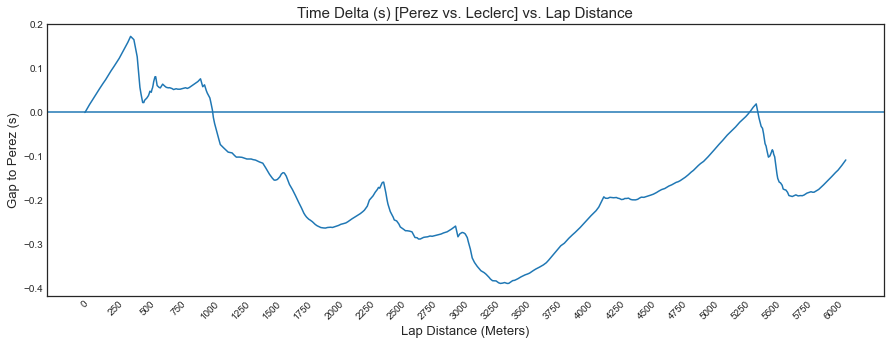

In [39]:
# Estimated Time Delta Plot

from matplotlib import rcParams

plt.style.use('seaborn-white')
rcParams['figure.figsize'] = (15,5)
plt.plot(ref_tel['Distance'], delta_time)
plt.axhline(0)
plt.ylabel("Gap to {} (s)".format('Perez'), fontdict={'size': 13})
plt.xlabel("Lap Distance (Meters)", fontdict={'size': 13})
plt.title('Time Delta (s) [Perez vs. Leclerc] vs. Lap Distance', fontdict={'size': 15})
plt.xticks(np.arange(0, np.max(ref_tel['Distance']), step=250), rotation = 45)
plt.show()
